## Analyze A/B Test e-commerce website



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='conclusions'></a>

<a id='intro'></a>
### Introduction


For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  my goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline
#I am setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.shape[0]

294478

In [4]:
#The number of unique users in the dataset.
df.user_id.nunique()

290584

In [5]:
#The proportion of users converted.
df.converted.sum()/ df.shape[0]

0.11965919355605512

In [6]:
#The number of times the new_page and treatment don't line up.
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df2= df.query('group == "treatment" and landing_page == "new_page" or group == "control" and  landing_page == "old_page" ')
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [9]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.user_id.nunique()

290584

In [11]:
# checking for dublicates
duplicated_value = df2.user_id[df2.user_id.duplicated()]
duplicated_value

2893    773192
Name: user_id, dtype: int64

In [12]:
a=df2.iloc[2893]
a

user_id                             673693
timestamp       2017-01-22 07:32:26.184894
group                            treatment
landing_page                      new_page
converted                                0
Name: 2924, dtype: object

In [13]:
# removing duplicates
df2.user_id.drop_duplicates()

0         851104
1         804228
2         661590
3         853541
4         864975
           ...  
294473    751197
294474    945152
294475    734608
294476    697314
294477    715931
Name: user_id, Length: 290584, dtype: int64

In [14]:
df2[df2['converted']==1].shape[0]/df2.shape[0]

0.11959667567149027

In [15]:
# the probability of an individual will convert from the control group
df2.query('group == "control" & converted == 1').shape[0]/df2[df2['group']=='control'].shape[0]

0.1203863045004612

In [16]:
# the probability of an individual will convert from the treatment group
df2.query('group == "treatment" & converted == 1').shape[0]/df2[df2['group']=='treatment'].shape[0]

0.11880724790277405

In [17]:
# the probability of an individual will recieve the new page
df2[df2['landing_page']=='new_page'].shape[0]/df2.shape[0]

0.5000636646764286

after cleaning the data, both proportions values are almost equal so these data show the new page leads to a slightly less conversions.


<a id='ab_test'></a>
### Part II - A/B Test



H0: P_old => P_new

H1: P_old < P_new

`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Performing the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Using the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [18]:
# the convert rate for  𝑝𝑛𝑒𝑤  under the null
p_new=df2.query('converted== 1').user_id.nunique()/df2.shape[0]
p_new

0.11959667567149027

In [19]:
# the convert rate for  𝑝𝑜𝑙𝑑  under the null
p_old=df2.query('converted== 1').user_id.nunique()/df2.shape[0]
p_old

0.11959667567149027

In [20]:
# n-new
n_treatment=df2.query('group == "treatment"').user_id.nunique()
n_treatment

145310

In [21]:
# n-old
n_control=df2.query('group == "control"').shape[0]
n_control

145274

In [22]:
# using random choice to generate results using the giving probabilty
n,p = n_treatment , 1-p_new
new_page_converted = np.random.choice(2,n,p=[p,p_new])
e=new_page_converted.sum()/len(new_page_converted)
e

0.12021196063588191

In [23]:
# p_new=p_old
n,p = n_control , 1-p_new
old_page_converted = np.random.choice(2,n,p=[p,p_new])
f=old_page_converted.sum()/len(old_page_converted)
f

0.11931247160538018

In [24]:
e-f

0.0008994890305017295

In [25]:
# simulating 𝑝𝑛𝑒𝑤  - 𝑝𝑜𝑙𝑑    10,000
new_converted_simulation = np.random.binomial(n_treatment, p_new, 10000)/n_treatment
old_converted_simulation = np.random.binomial(n_control, p_old, 10000)/n_control
p_diffs = new_converted_simulation - old_converted_simulation


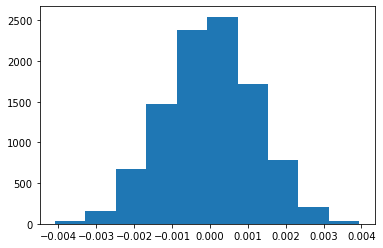

In [26]:
# ploting
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
p_diffs=np.array(p_diffs)
normal_dist=np.random.normal(0,p_diffs.std(),p_diffs.size)

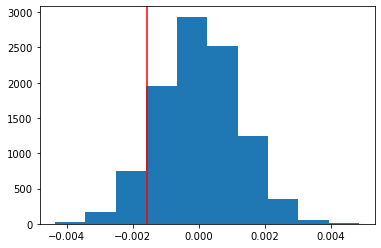

In [28]:

b=df2.query('group == "control" & converted == 1').shape[0]/df2[df2['group']=='control'].shape[0]
c=df2.query('group == "treatment" & converted == 1').shape[0]/df2[df2['group']=='treatment'].shape[0]
x=c-b
plt.hist(normal_dist);
plt.axvline(x=x, color='red')

In [29]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > obs_diff).mean()

0.9017

In [30]:
# using another method to see the difference 
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted== 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted== 1').shape[0]
n_old =  df2.query('landing_page == "old_page"').shape[0]
n_new =  df2.query('landing_page == "new_page"').shape[0]

In [31]:
# from  https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(count, nobs,alternative = 'smaller')


#failed attempts
#successes = np.array([convert_old, convert_new])
#samples = np.array([sample_size_a, n_new]
#stat, p_value = proportions_ztest(successes, samples, alternative='two-sided')
#from sonalake  https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/

#stat, p_value = proportions_ztest(count=convert_old, nobs=n_old, value=p_new)
#stat, p_value2 = proportions_ztest(count=convert_new, nobs=n_new, value=p_new)
stat, pval

(1.3116075339133115, 0.905173705140591)

The p Value using this method and the other one is almost equal
which indicate we can reject the null

<a id='regression'></a>
### Part III - A regression approach

Using regression instead of A/B testing.

Since each row is either a conversion or no conversion, I'll use logistic regression.

In [32]:
# using statsmodels to fit the regression model to see a significant difference in conversion based on which page a customer receives 
df2['intercept']=1
a=pd.get_dummies(df2.group)
b=pd.get_dummies(df2.landing_page)
df2=df2.join(a)
df2=df2.join(b)
#df2.drop(['control','old_page'],axis=1, inplace=True)

<ipython-input-32-44e5c454e212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept']=1


In [33]:
df2.rename(columns={"treatment": "ab_page"},inplace=True)
b

,new_page,old_page
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
294473,0,1
294474,0,1
294475,0,1
294476,0,1


In [34]:
df2

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0,0,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0,0,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0,0,1


In [35]:
# fitting the model.
lm= sm.Logit(df2['converted'],df2[['intercept','ab_page']])
res= lm.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.6032
Date:               2021-08-04 22:47 BIC:              212801.7625
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      0.18965    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# summary
1/np.exp(-.0150)
#  for every unit decrease in the treatment column there is 1.96 in the converted clients
#  for every unit decrease in the old_page visits there  1.931 in the converted clients

1.015113064615719

for every unit decrease in the treatment column there is 1.015 in the converted clients.

Which isn't that sagnificane

The p_value=.1897

the p_value in part 3 and 2 are very different due to 
in regeression the pvalue are giving for testing the explantory variable relationship with the null which is why the p value in the regression is high which show the values aren't that sagnificante

the difference between p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.

to find out if there are other factors that affect the converted rate other than the new or old page and if the converted rate differ bettween the two countries.

correlated error and outliers could exist between the new columns and the converted.

In [37]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [38]:
### Dummies
df_new[['CA','UK','US']]= pd.get_dummies(df_new.country)

In [39]:
lm= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','UK']])
res= lm.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.3782
Date:               2021-08-04 22:47 BIC:              212823.6968
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.17584    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
US             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [40]:
1/np.exp(-.015) , np.exp(.0408) , np.exp(.0506)

(1.015113064615719, 1.0416437559600236, 1.0519020483004984)

all of the P_Values >.05 , which isn't statistically sagnificante enough to reject the null.

1- for each one unit decrease in ab_page convert rate is 1.015 as likly to increase.

2- for each one unit increase in US convert rate is 1.042 as likly to increase.

3- for each one unit increase in UK convert rate is 1.052 as likly to increase.

In [41]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
lm2= sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','UK','UK_ab_page','US_ab_page']])

In [42]:
countries_df.country.nunique()


3

In [43]:
### Fitting the Linear Model
res2= lm2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9124
Date:               2021-08-04 22:47 BIC:              212846.3903
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.19182    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
==================================================================

"""

In [44]:
1/np.exp(-0.0674),np.exp(0.0175),np.exp(0.0118),np.exp(0.0783),np.exp(0.0469)

(1.0697232819209153,
 1.0176540221507617,
 1.011869894648401,
 1.0814470441230692,
 1.048017202119183)

The P_value for each exolantory is less than .05 which means that it's not statistaclly  significante.

Looking at the coef for each explantory:

1- for each one unit decrease in ab_page convert rate is 1.069 as likly to increase.

2- for each one unit increase in US convert rate is 1.0176 as likly to increase.

3- for each one unit increase in UK convert rate is 1.0119 as likly to increase. 

4- for each one unit increase in UK convert rate is 1.081 as likly to increase.
 
5- for each one unit increase in UK convert rate is 1.048 as likly to increase.

<a id='conclusions'></a>
## Conclusions

The p_values calculated through the test is less than the error rate .05 (part II = .9 and part III = .19, which shows rthat non of the differences is significante 

<a id='References'></a>
## References

https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

Udacity